In [1]:
import pandas as pd
data123 = pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx', sheet_name=None)

In [ ]:
# data123['企业信息']['企业代号']
for row_id, company_name in enumerate(data123['企业信息']['企业代号']):
    print(row_id, company_name)
    # print(row_id + com_id)

/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/godkillerxiao/miniconda3/lib/python

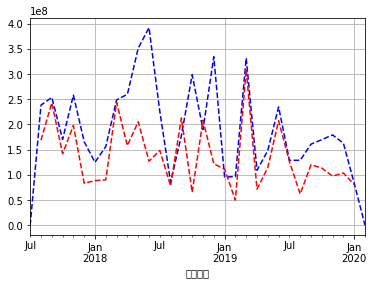

In [41]:
# 测试单元格
# a, b, c, d = data123['企业信息'].iloc[1]
# print(a, b, c, d)
# data123['进项发票信息'].sort_values(by='开票日期')
# data123['进项发票信息']['金额'].values
df = data123['进项发票信息'][data123['进项发票信息']['企业代号'] == 'E1']  # DataFrame belonged to `E1`
ts = pd.Series(df['金额'].values, index=df['开票日期'])
ts_new = ts.resample('1M').sum()
ts_new.plot(kind='line', grid=True, label='S1', style='--', color='blue')

df_sell = data123['销项发票信息'][data123['销项发票信息']['企业代号'] == 'E1']
ts_sell = pd.Series(df_sell['金额'].values, index=df_sell['开票日期'])
ts_new_sell = ts_sell.resample('1M').sum()
ts_new_sell.plot(kind='line', grid=True, label='S1', style='--', color='red')

In [2]:
from typing import List, Union, OrderedDict as MyOrderedDict, Dict
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import difflib
import string

class General:
    """
    通用模块
    """
    amount_bound = (10, 100)
    interest_bound = (0.04, 0.15)
    period = 1

class InvoiceType:
    Valid = 1
    Invalid = 2

class CompanyCluster:
    """
    根据脱敏后的企业名称进行的分类
    """
    STOP_WORDS_LIST = [
        '*',
        '有限公司',
        '有限责任公司',
        '分公司',
        '总公司',
        '经营部',
        '事务所',
    ] + list(string.ascii_letters) + list(string.digits)
    TYPE_KEYWORD_DICT = {
        "电力、热力、燃气及水生产和供应业": ['电力', '水务'],
        "建筑业": ['建筑', '灯饰', '装饰', '建材', '工程造价', '建设'],
        "批发和零售业": ['商贸', '服饰', '销售'],
        "交通运输、仓储和邮政业": ['物流', '快递', '邮递', '邮政'],
        "农、林、牧、渔业": ['蔬菜', '园林', '农业'],
        "采矿业": ['矿业'],
        "制造业": ['材料', '机械', '汽车', '电子', '实业', '食品', '家电'],
        "租赁和商务服务业": [],
        "科学研究和技术服务业": ['勘察院', '研究院'],
        "水利、环境和公共设施管理业": ['地质', '灾害'],
        "居民服务、修理和其他服务业": ['药'],
        "住宿和餐饮业": ['旅店', '酒店'],
        "信息传输、软件和信息技术服务业": ['科技', '通信', '通讯', '电脑', '技术'],
        "金融业": ['财务', '财税'],
        "房地产业": ['房产'],
        "国际组织": [],
        "卫生和社会工作": ['医疗'],
        "教育": ['教育'],
        "公共管理、社会保障和社会组织": ['消防', '社会福利'],
        "文化、体育和娱乐业": ['文化', '体育', '文娱', '娱乐', '广告', '图书', '传媒'],
        "个体经营": ['个体经营'],
        "其他": []
    }
    type_dict: Dict[str, List[str]] = {k: [] for k in TYPE_KEYWORD_DICT.keys()}

    def __init__(self):
        # self.type_dict = {k: [] for k in self.TYPE_KEYWORD_DICT.keys()}
        pass

    @staticmethod
    def get_cluster(company_name) -> str:
        k_company_name = CompanyCluster.filter(company_name)
        hit_flag = None
        for k, v in CompanyCluster.TYPE_KEYWORD_DICT.items():
            if CompanyCluster.get_close_matches(k_company_name, v):
                CompanyCluster.type_dict[k].append(company_name)
                hit_flag = k
                break
        if hit_flag is None:
            CompanyCluster.type_dict["其他"].append(company_name)
        return hit_flag

    @staticmethod
    def get_close_matches(target: str, src: List[str]):
        for kw in src:
            if target in kw or kw in target:
                return True
        return False
    @staticmethod
    def filter(company_name: str) -> str:
        """
        移除公司名称中的所有停用词
        :param company_name:
        :return:
        """
        ret = company_name
        for stop_word in CompanyCluster.STOP_WORDS_LIST:
            ret = ret.replace(stop_word, '')
        return ret
class CompanyMetric:
    """
    企业指标
    """
    def __init__(self):
        pass

class CompanyInfo:
    violation_mapping = {
        '是': True,
        '否': False,
        '': None
    }
    GRADE_LIST = ['A', 'B', 'C', 'D']
    def __init__(self, company_id, company_name, grade, violation):
        self.company_id: str = company_id
        self.company_name: str = company_name
        self.grade: str = grade.strip()
        assert self.grade in self.GRADE_LIST
        self.violation: Union[None, bool] = self.violation_mapping[violation]
        self.in_transaction: List[InTransaction] = []
        self.out_transaction: List[OutTransaction] = []
        self.industry = CompanyCluster.get_cluster(self.company_name)

    def get_out_invalid_rate(self):
        judge = lambda in_trans: in_trans.status == InvoiceType.Invalid
        out_invalid = list(filter(judge, self.out_transaction))
        return len(out_invalid) / len(self.out_transaction)

class InTransaction:
    status_mapping = {
        '有效发票': InvoiceType.Valid,
        '作废发票': InvoiceType.Invalid
    }
    def __init__(self, invoice_id, timestamp, seller_id,
                 amount, tax_amount, total_amount, status: str):
        self.invoice_id: str = invoice_id
        self.timestamp: pd.Timestamp = timestamp
        self.seller_id: str = seller_id
        self.amount: float = amount
        self.tax_amount: float = tax_amount
        self.total_amount: float = total_amount
        if not np.isclose(self.amount + self.tax_amount, self.total_amount):
            # 特殊情况处理1：部分发票金额+税额不等于总金额，这种发票均为税额显示为正的负数发票
            # 处理办法：将税额取相反数
            print('Invoice ID: {}, {:.4f} + {:.4f} != {:.4f}'.format(invoice_id, self.amount, self.tax_amount, self.total_amount))
            print('Trying to fix it by inverting tax amount...')
            self.tax_amount = -self.tax_amount
            assert np.isclose(self.amount + self.tax_amount, self.total_amount), 'Fix Failed, Please Check Your Data...'
            print('Fixed!')
        self.status: int = self.status_mapping[status.strip()]
        if self.status == InvoiceType.Invalid:
            # 特殊情况2：出现了负数的作废发票，这种情况意味着负数发票被作废，应理解为交易双方退款后又取消退款
            # if self.amount < 0 or self.tax_amount < 0:
            #     print('An Invalid Invoice {} but with an amount {} and an tax amount {}'.format(invoice_id, amount, tax_amount))
            self.amount = -self.amount
            self.tax_amount = -self.tax_amount
            self.total_amount = -self.total_amount

    def get_tax_rate(self):
        ret = self.tax_amount / self.amount
        if np.isnan(ret):
            print('InvoiceID {} {} / {} returns a NaN'.format(self.invoice_id, self.tax_amount, self.amount))
            return None
        return ret


class OutTransaction(InTransaction):
    def __init__(self, invoice_id, timestamp, buyer_id,
                 amount, tax_amount, total_amount, status: str):
        super(OutTransaction, self).__init__(
            invoice_id, timestamp, '', amount, tax_amount, total_amount, status)
        del self.seller_id
        self.buyer_id = buyer_id


class Problem1:
    interest_type_mapping = {
        'monthly': '1M',
        'yearly': '1Y'
    }
    def __init__(self, dataframe: MyOrderedDict, debug=True, load_all='Yes'):
        self.debug = debug
        self.company_info: Dict[str, CompanyInfo] = OrderedDict()
        # 'E1': instance of CompanyInfo
        if load_all != 'Yes':  # if not Yes, load only certain company info
            dataframe['企业信息'] = dataframe['企业信息'][dataframe['企业信息']['企业代号'] == load_all]
            dataframe['进项发票信息'] = dataframe['进项发票信息'][dataframe['进项发票信息']['企业代号'] == load_all]
            dataframe['销项发票信息'] = dataframe['销项发票信息'][dataframe['销项发票信息']['企业代号'] == load_all]

        for row_id in dataframe['企业信息'].index:
            company_id, company_name, grade, violation = dataframe['企业信息'].iloc[row_id]
            self.company_info[company_id] = CompanyInfo(company_id, company_name, grade, violation)

        for row_id in dataframe['进项发票信息'].index: # 进项：In
            company_id, invoice_id, timestamp, seller_id, amount, tax_amount, total_amount, status = \
                dataframe['进项发票信息'].iloc[row_id]
            self.company_info[company_id].in_transaction.append(InTransaction(invoice_id, timestamp, seller_id, amount, tax_amount, total_amount, status))

        for row_id in dataframe['销项发票信息'].index:  # 销项：Out
            company_id, invoice_id, timestamp, buyer_id, amount, tax_amount, total_amount, status = \
                dataframe['销项发票信息'].iloc[row_id]
            self.company_info[company_id].out_transaction.append(OutTransaction(invoice_id, timestamp, buyer_id, amount, tax_amount, total_amount, status))

    def get_company_interest(self, company_id='E1', _type='monthly') -> (pd.Series, pd.Series, pd.Series):
        company_info = self.company_info[company_id]
        income_amount = [in_trans.amount for in_trans in company_info.in_transaction]
        # print(sum(income_amount))
        income_timestamp = [in_trans.timestamp for in_trans in company_info.in_transaction]
        income_ts = pd.Series(income_amount, index=income_timestamp)
        income_ts_resampled: pd.Series = income_ts.resample(self.interest_type_mapping[_type]).sum()

        out_amount = [out_trans.amount for out_trans in company_info.out_transaction]
        # print(sum(out_amount))

        out_timestamp = [out_trans.timestamp for out_trans in company_info.out_transaction]
        out_ts = pd.Series(out_amount, index=out_timestamp)
        out_ts_resampled: pd.Series = out_ts.resample(self.interest_type_mapping[_type]).sum()

        # 将resample后的两个Time Series做处理，只取出共有部分
        time_points = set(list(income_ts_resampled.keys()) + list(out_ts_resampled.keys()))
        # for time_point in :
        #     time_points.update(time_point)
        # 从共有时间点构造新的Time Series
        income_ts_resampled = pd.Series({k: v for k, v in income_ts_resampled.items() if k in time_points})
        # print(income_ts_resampled)
        out_ts_resampled = pd.Series({k: v for k, v in out_ts_resampled.items() if k in time_points})
        # print(out_ts_resampled)
        if self.debug:
            plt.figure(company_id)
            ans: pd.Series = out_ts_resampled - income_ts_resampled
            ans.plot(kind='line', grid=True, label='S1', style='--')


        return out_ts_resampled - income_ts_resampled, out_ts_resampled, income_ts_resampled

    def get_tongbi(self, company_id, _type: Union[str, pd.Series] ='in', freq='monthly'):
        # assert _type in ['in', 'out', 'interest'], 'TongBi Type {} Not Supported!'.format(_type)
        if isinstance(_type, pd.Series):
            ts = _type.copy()
        elif _type == 'in':
            _, _, ts = self.get_company_interest(company_id, _type='monthly')
        elif _type == 'out':
            _, ts, _ = self.get_company_interest(company_id, _type='monthly')
        elif _type == 'interest':
            ts, _, _ = self.get_company_interest(company_id, _type='monthly')
        else:
            raise NotImplementedError
        ts: pd.Series
        diff_ret = ts.diff(12)
        diff_ret.fillna(0, inplace=True)
        return diff_ret / (ts - diff_ret), ts  # 同比Series & 原始Series

    def get_out_tax_rate(self, company_id) -> (str, List[float]):
        # 从销方发票信息计算各有效订单税率
        _filter_valid = lambda trans: trans.status == InvoiceType.Valid
        company_info = self.company_info[company_id]
        out_tax_rate = np.array([trans.get_tax_rate() for trans in company_info.out_transaction if trans.get_tax_rate() is not None])
        statistic = out_tax_rate.mean(), out_tax_rate.std(), out_tax_rate.var(), out_tax_rate.max(), out_tax_rate.min()
        if any(np.isnan(k) for k in statistic):
            print("Nan!")
            print(out_tax_rate)
        else:
            print('Company {} Mean: {}, Std:{}, Var:{}, Max:{}, Min:{}'.format(
                company_id, *statistic))
        return company_info.company_name, out_tax_rate

    def get_dt_train_data(self, output='train_dt.csv'):
        # 决策树训练数据导出，用来训练（实力）->（信誉评级）的决策树模型
        # 月均利润，月均进/销量, 12个月同比利润增长率，进项额同比标准差，销项额同比标准差，发票作废率
        # A/B 存货周转率
        def remove_invalid_idx(a: pd.Series) -> List[int]:
            return [a.index[idx] for idx in range(len(a)) if np.isinf(a[idx]) or np.isnan(a[idx]) or np.isclose(a[idx], 0)]
        columns = ['公司ID', '月均公司利润', '月均销售利润率', '月均成本利润率', '进项同比标准差', '销项同比标准差', '销项发票作废率', '是否违约', '信誉评级']
        df = pd.DataFrame(columns=columns)
        for company_id in self.company_info.keys():
            interest_ts, out_ts, in_ts = self.get_company_interest(company_id)
            interest_out_rate = interest_ts / out_ts
            interest_out_rate.drop(remove_invalid_idx(interest_out_rate), inplace=True)
            interest_in_rate = interest_ts / in_ts
            interest_in_rate.drop(remove_invalid_idx(interest_in_rate), inplace=True)
            in_tongbi, _ = self.get_tongbi(company_id, in_ts)
            in_tongbi.drop(remove_invalid_idx(in_tongbi), inplace=True)
            out_tongbi, _ = self.get_tongbi(company_id, out_ts)
            out_tongbi.drop(remove_invalid_idx(out_tongbi), inplace=True)

            # if np.isnan(in_tongbi.std()):
            #     print("{} InTongBi.std() returns a NaN...{}".format(company_id, in_tongbi))
            #     in_tongbi = self.get_tongbi(company_id, in_ts, 'yearly')
            #     in_tongbi.drop(remove_invalid_idx(in_tongbi), inplace=True)
            #
            # assert not np.isnan(out_tongbi.std()), "{} OutTongBi.std() returns a NaN...{}".format(company_id, out_tongbi)

            df.loc[df.shape[0]] = {'公司ID': company_id,
                                   '月均公司利润': interest_ts.mean(),
                                   '月均销售利润率': interest_out_rate.mean(),
                                   '月均成本利润率': interest_in_rate.mean(),
                                   '进项同比标准差': in_tongbi.std() if not np.isnan(in_tongbi.std()) else 0.0,
                                   '销项同比标准差': out_tongbi.std() if not np.isnan(out_tongbi.std()) else 0.0,
                                   '销项发票作废率': self.company_info[company_id].get_out_invalid_rate(),
                                   '是否违约': self.company_info[company_id].violation,
                                   '信誉评级': self.company_info[company_id].grade
                                   }
        df.to_csv(output, encoding='gbk')

    def get_train_data(self):
        # 实力：月均利润，月均进/销量
        pass

Invoice ID: 76244287, -22.5400 + 0.6800 != -23.2200
Trying to fix it by inverting tax amount...
Fixed!
Invoice ID: 37295688, -120.9300 + 0.6900 != -121.6200
Trying to fix it by inverting tax amount...
Fixed!
Invoice ID: 82240, -4.6400 + 0.4600 != -5.1000
Trying to fix it by inverting tax amount...
Fixed!


/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:222: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:222: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:222: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

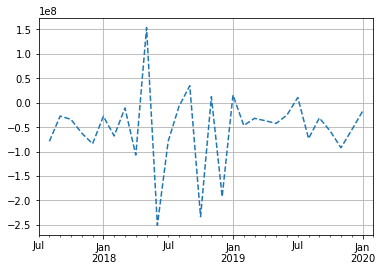

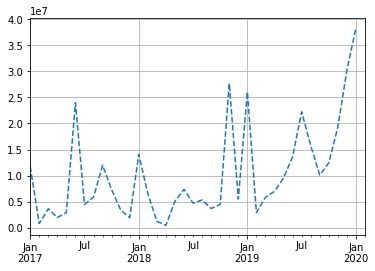

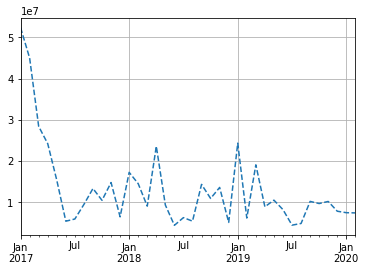

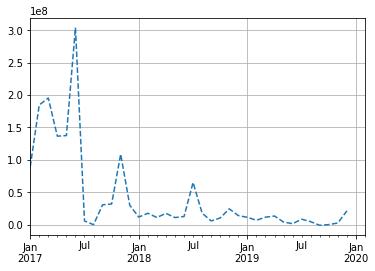

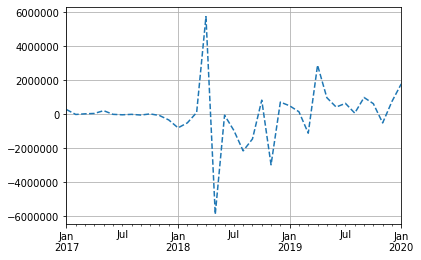

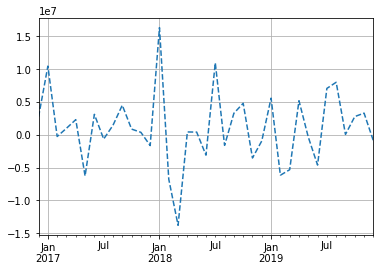

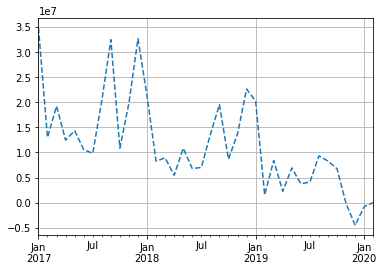

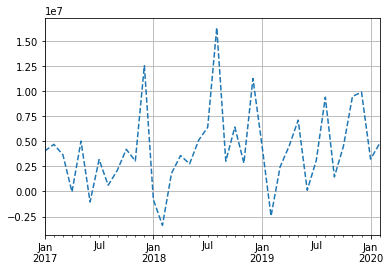

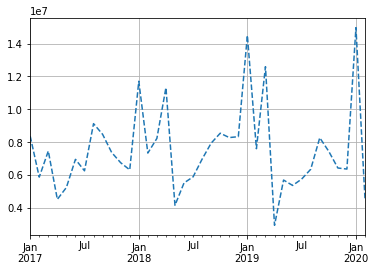

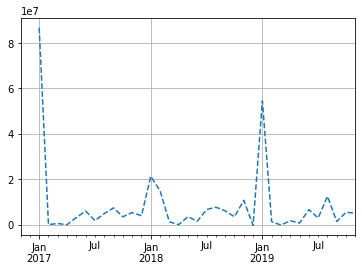

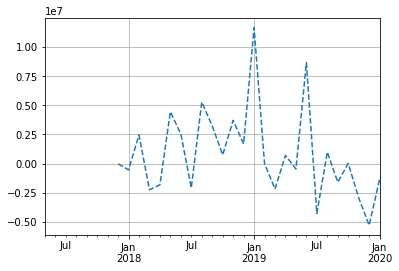

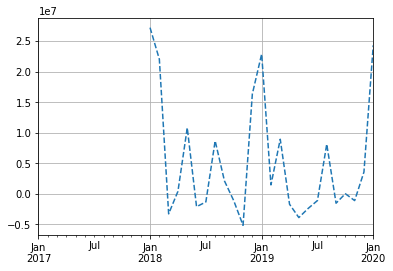

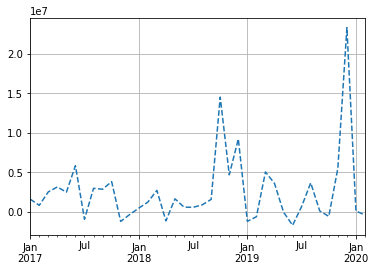

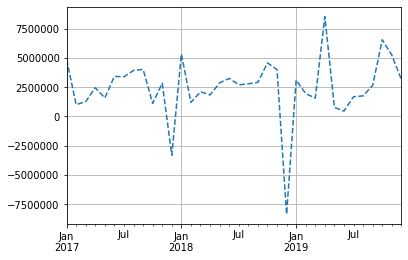

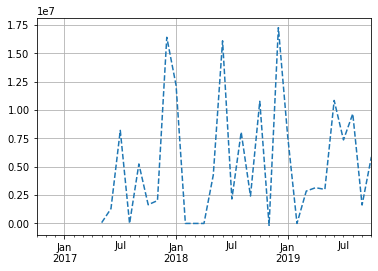

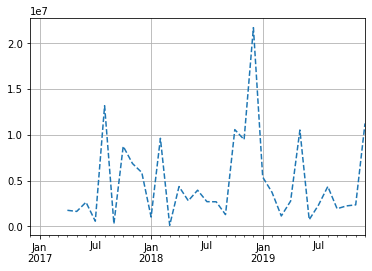

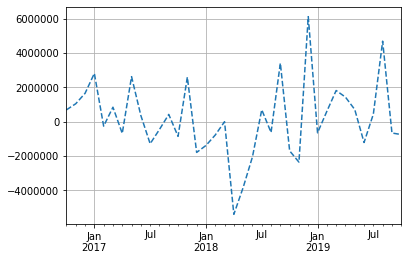

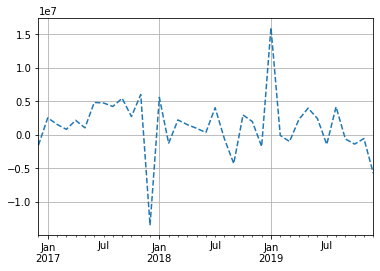

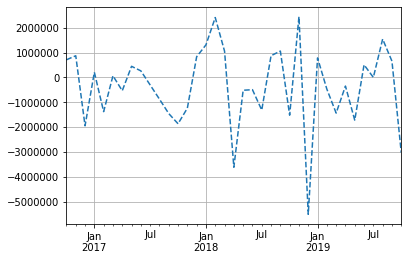

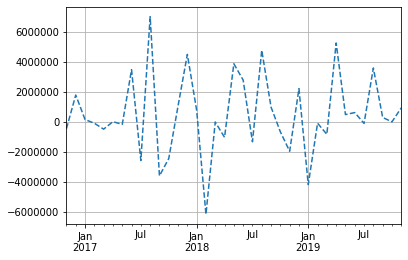

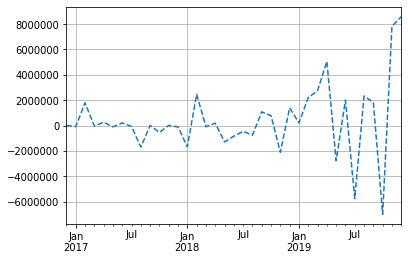

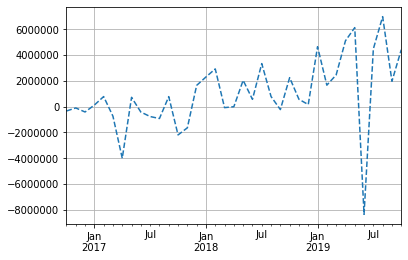

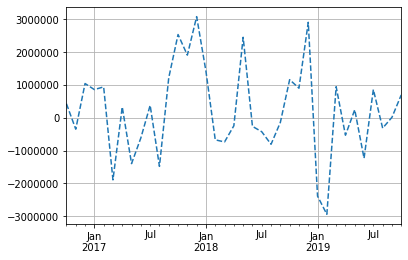

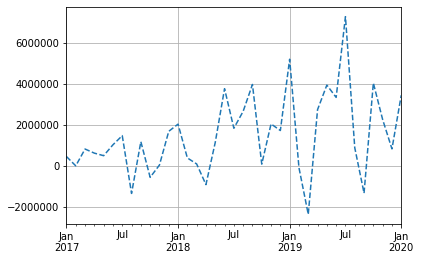

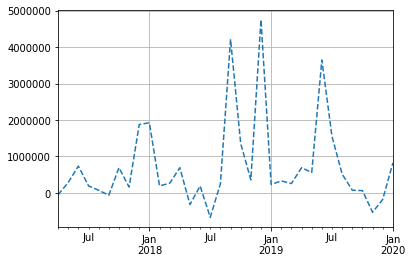

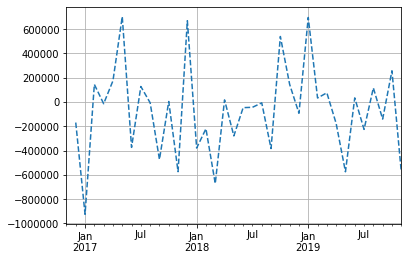

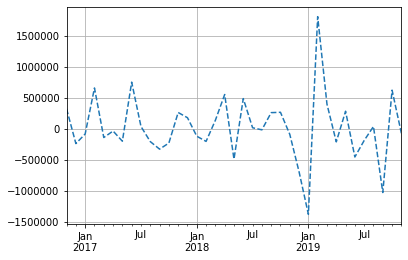

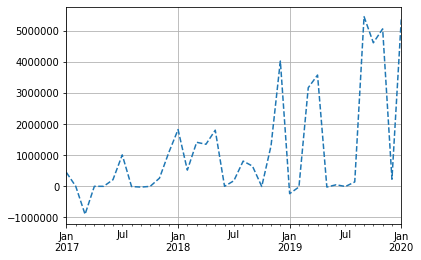

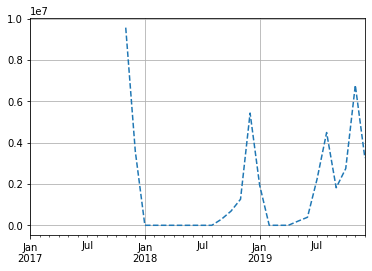

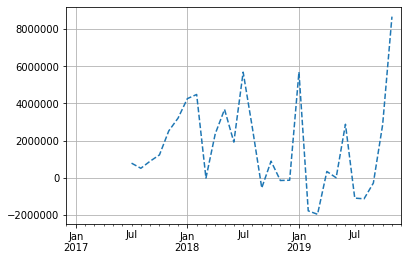

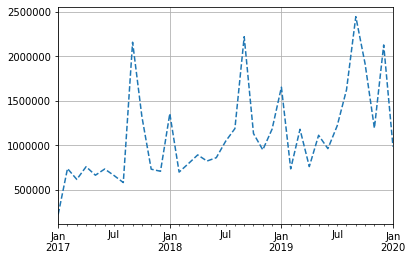

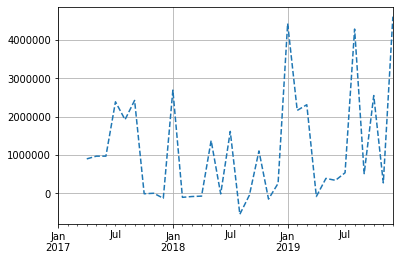

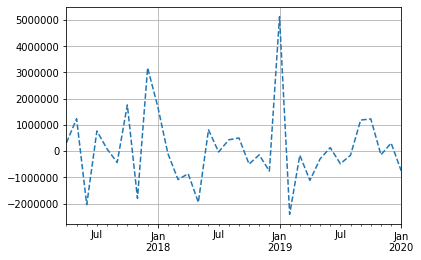

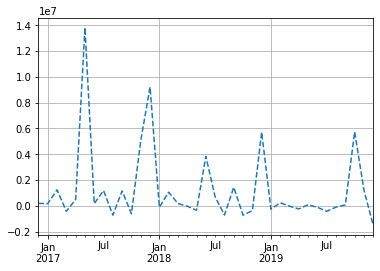

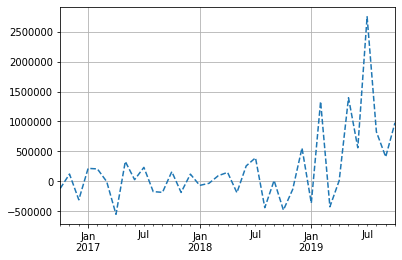

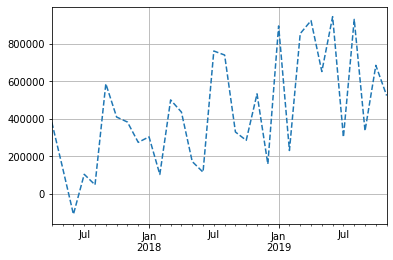

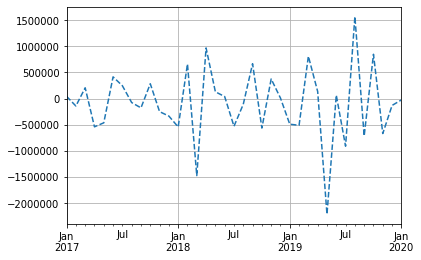

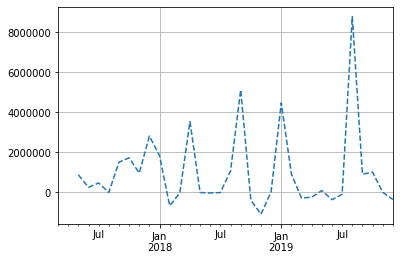

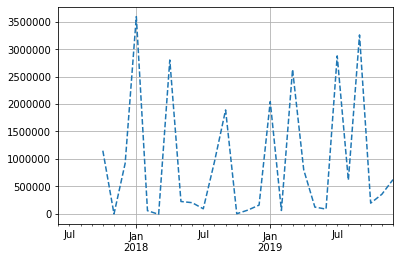

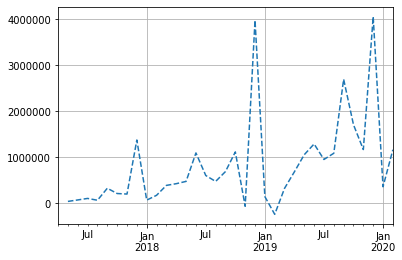

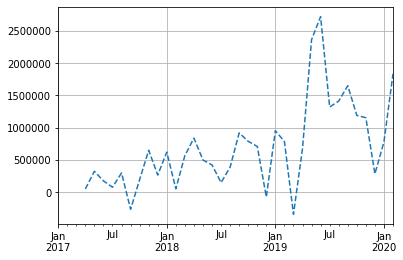

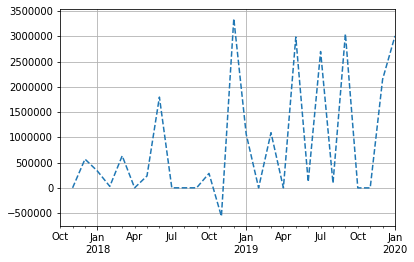

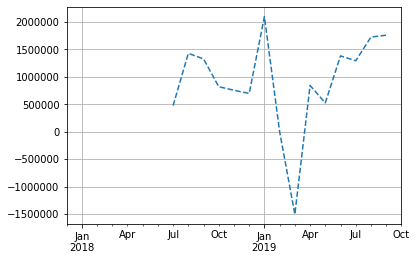

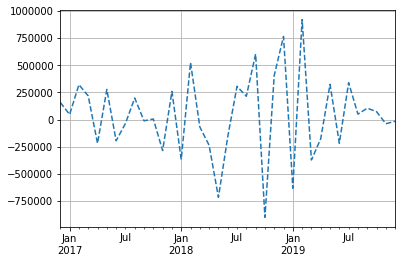

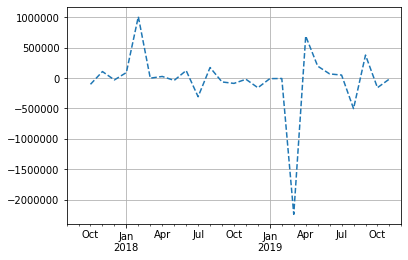

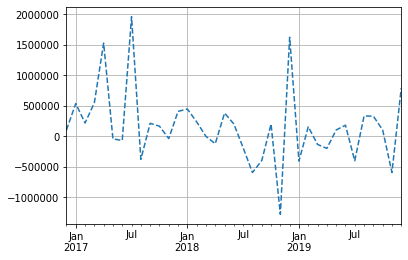

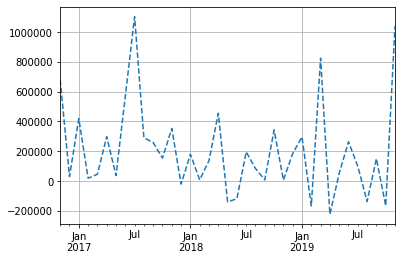

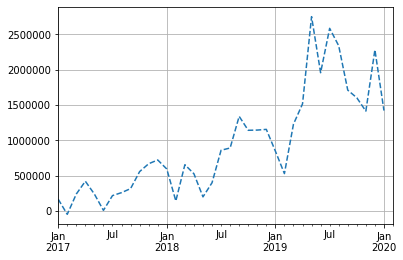

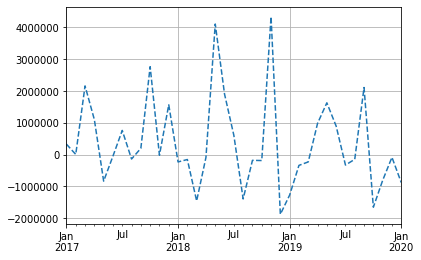

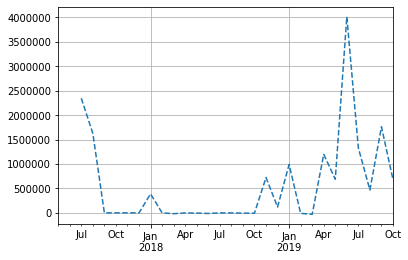

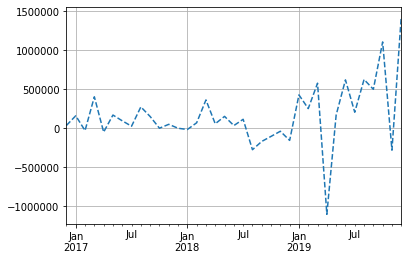

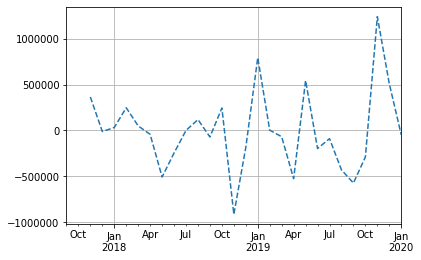

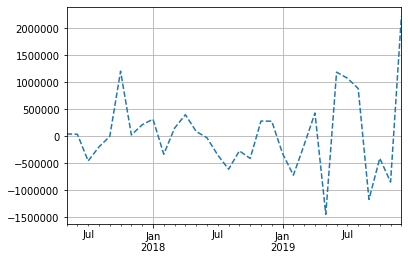

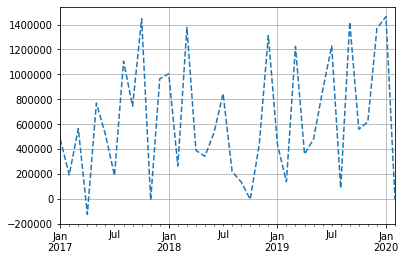

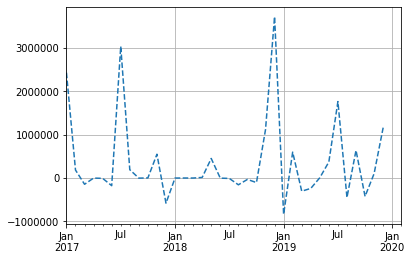

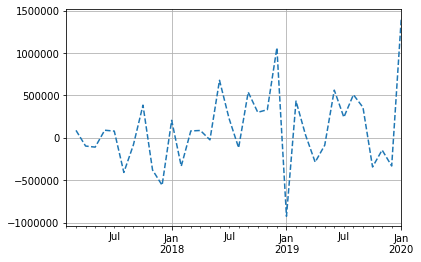

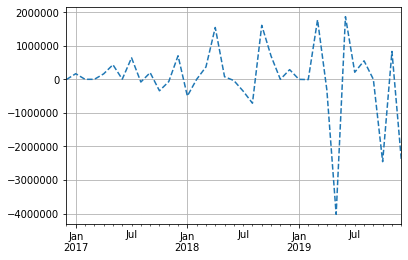

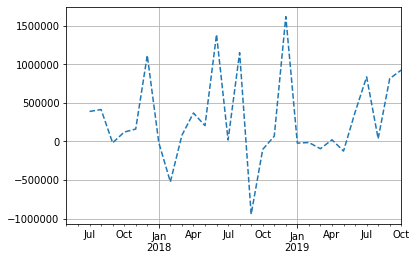

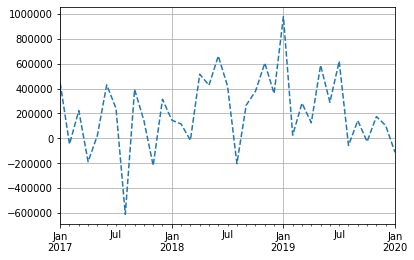

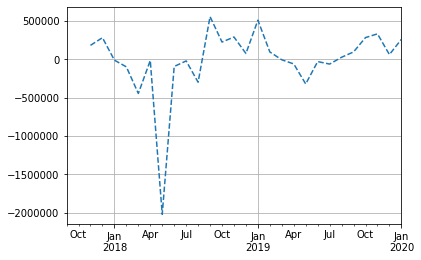

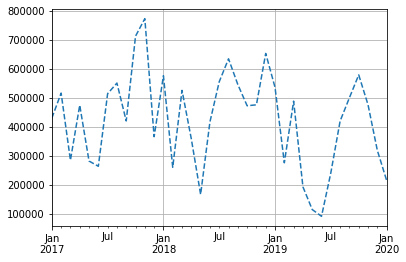

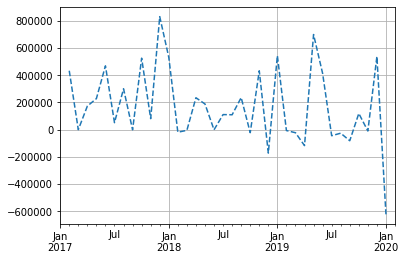

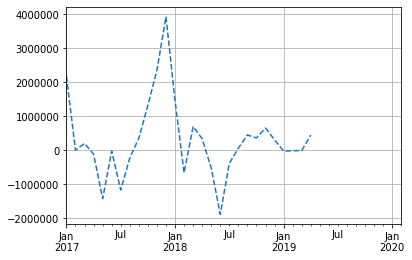

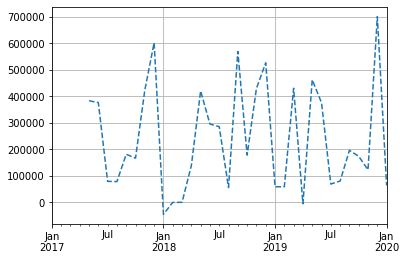

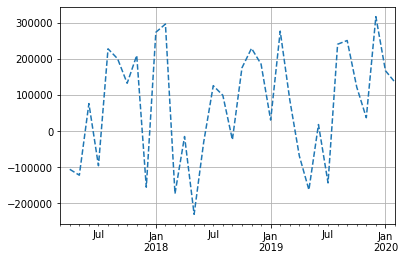

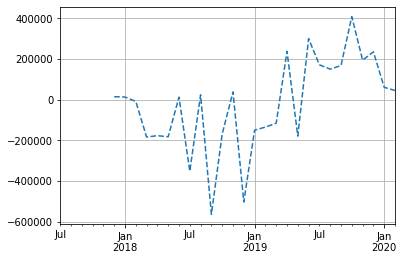

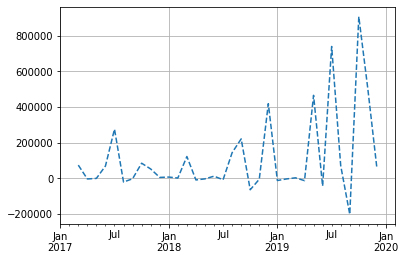

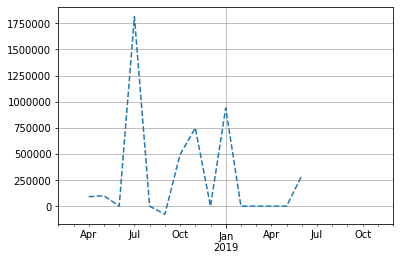

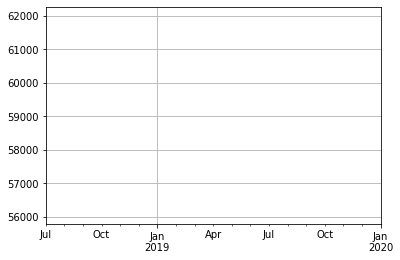

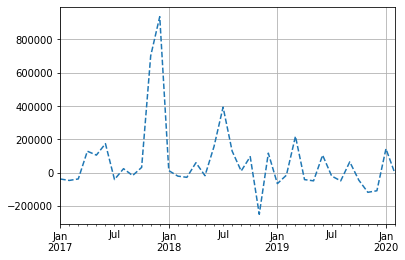

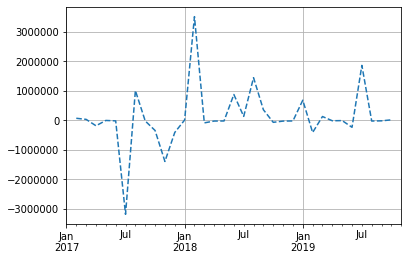

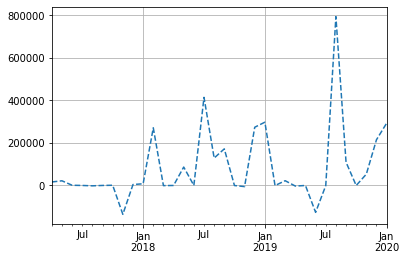

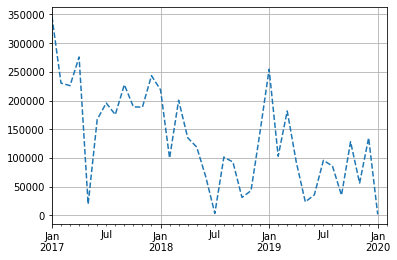

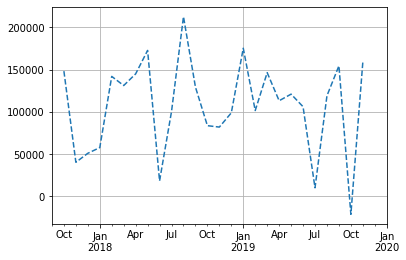

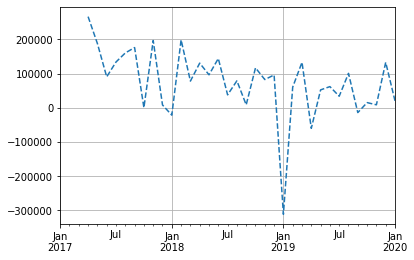

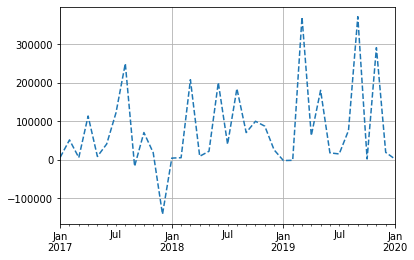

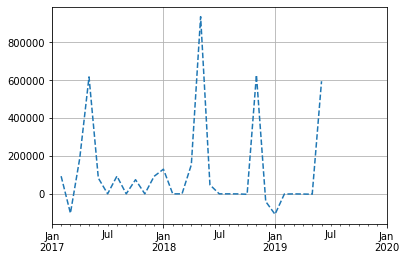

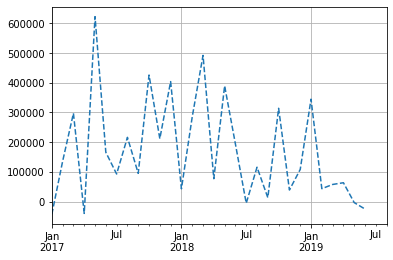

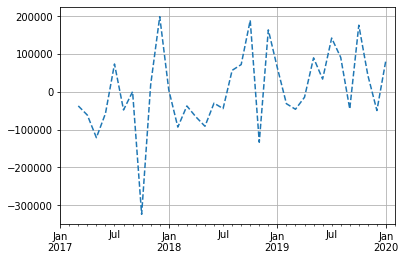

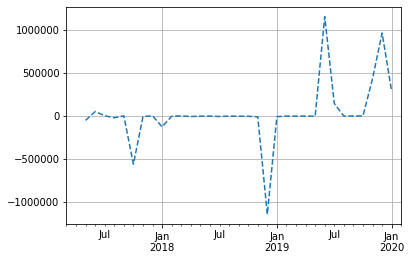

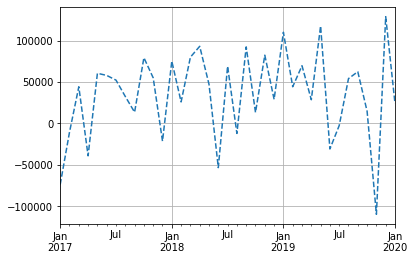

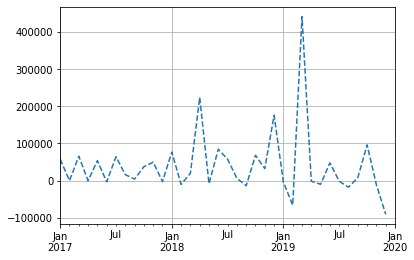

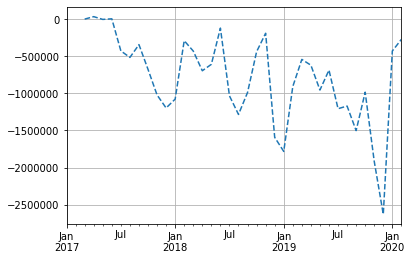

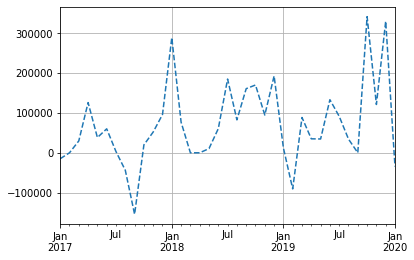

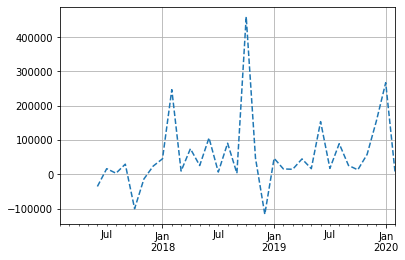

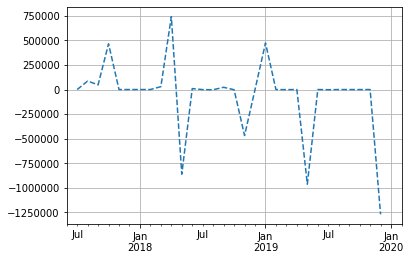

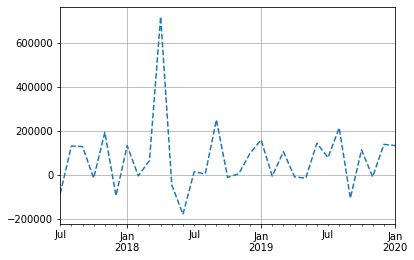

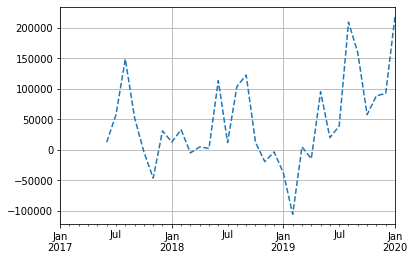

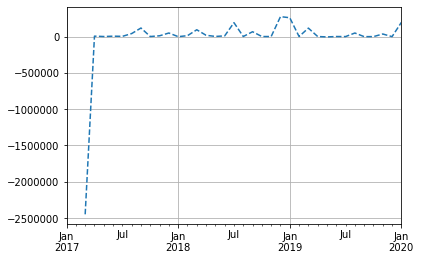

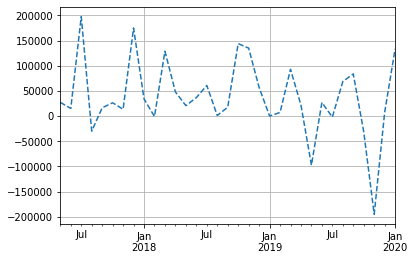

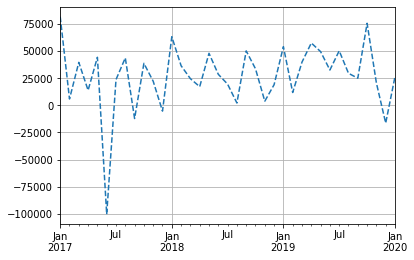

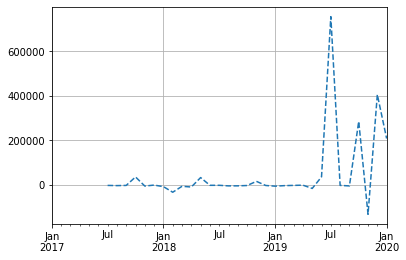

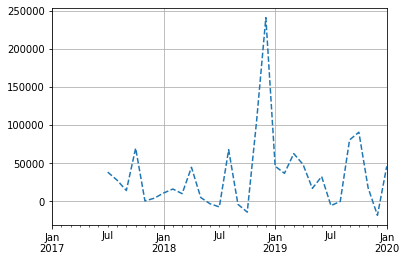

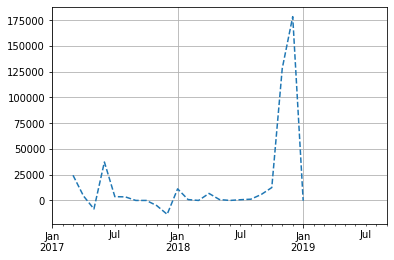

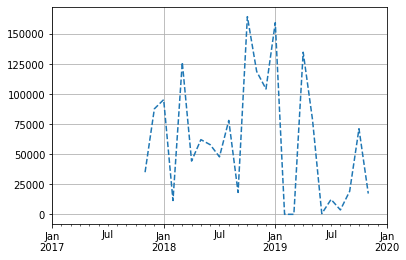

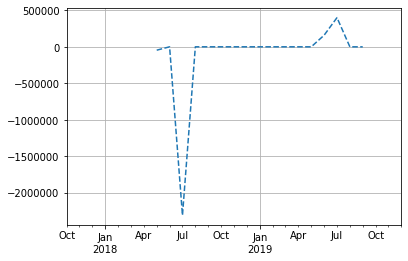

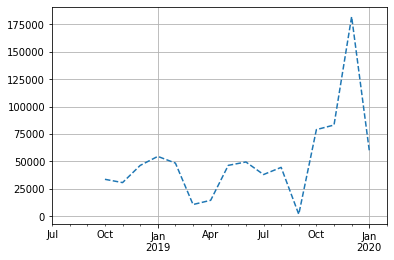

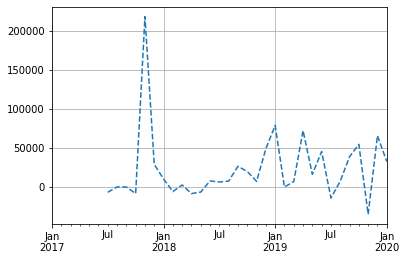

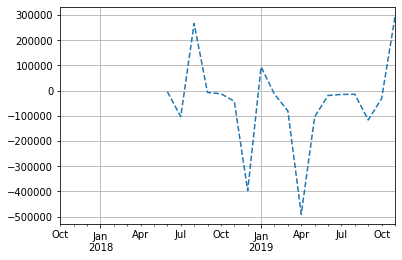

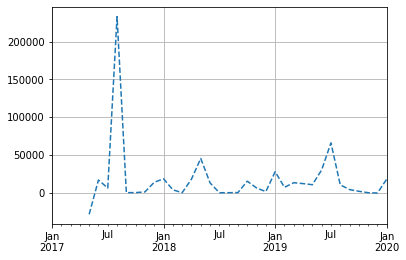

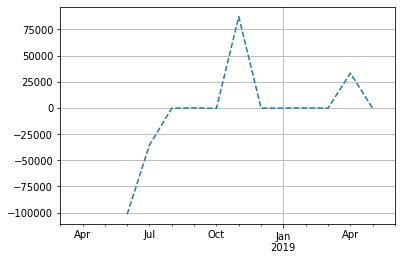

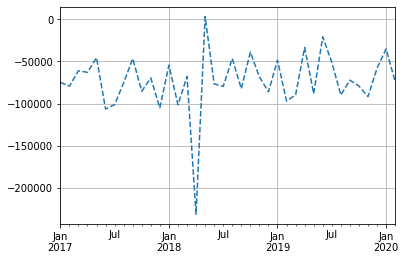

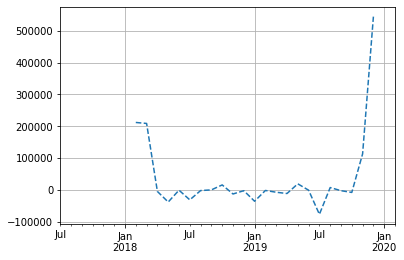

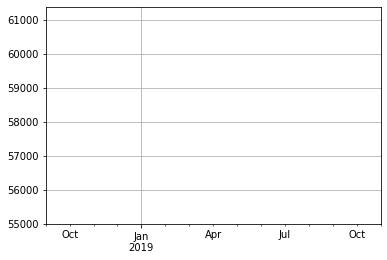

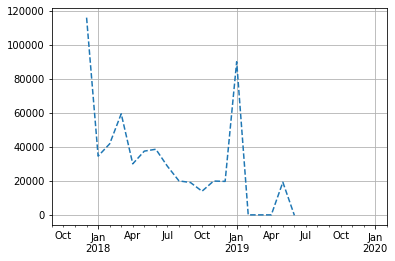

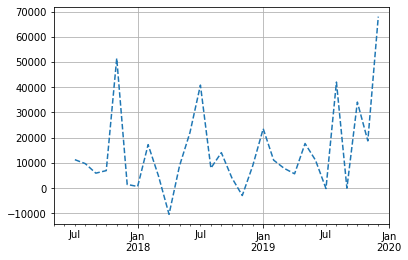

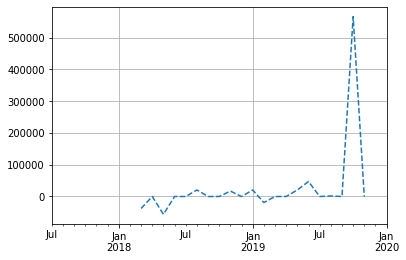

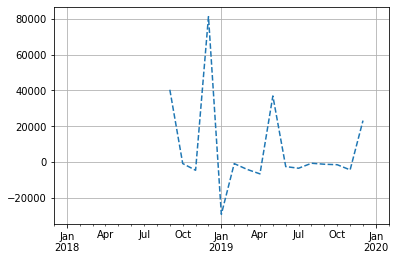

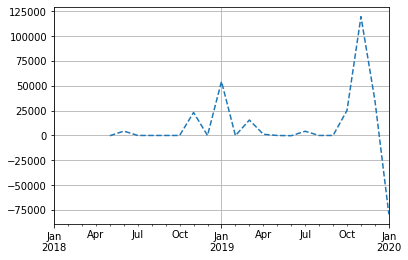

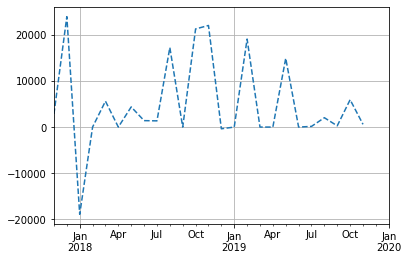

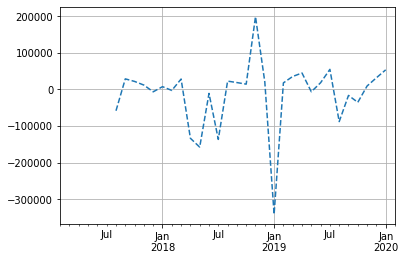

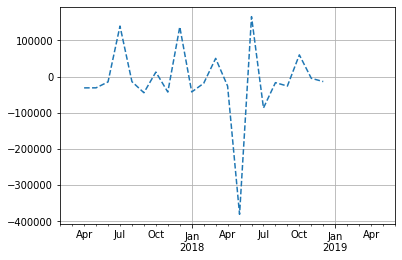

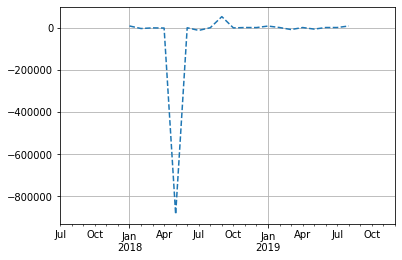

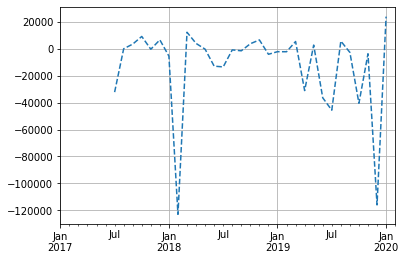

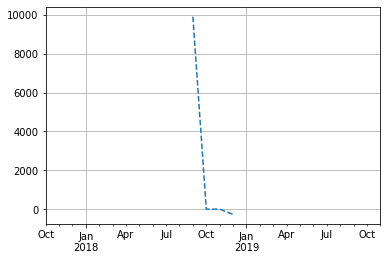

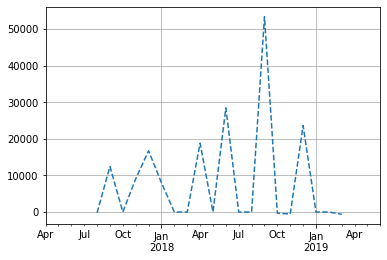

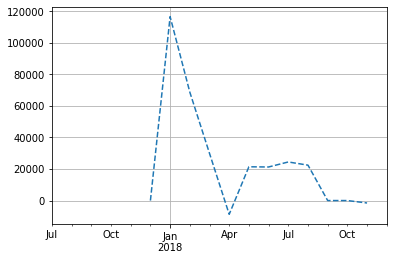

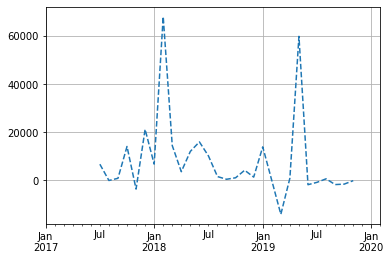

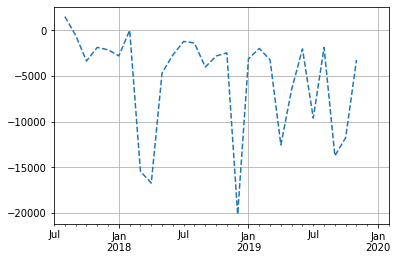

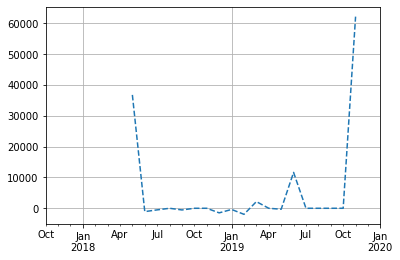

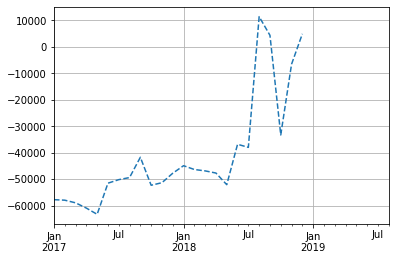

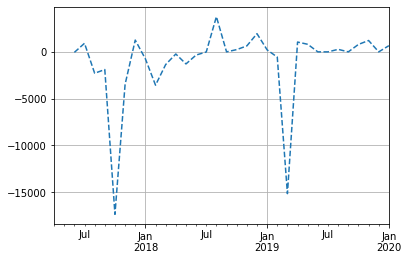

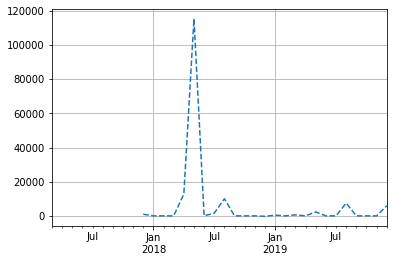

In [10]:
# 每个公司ID的税率list
# p1 = Problem1(data123.copy(), load_all='Yes')
# for company_id in p1.company_info.keys():
#     company_name, out_tax_rate = p1.get_out_tax_rate(company_id)
p1 = Problem1(data123.copy(), load_all='Yes')
p1.get_dt_train_data()


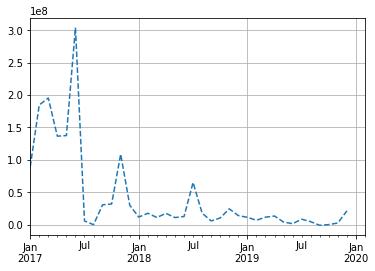

In [24]:
interest_ts, out_ts, in_ts = p1.get_company_interest('E4')
interest_rate = interest_ts / out_ts
diff_ret = in_ts.diff(12)
diff_ret.fillna(0, inplace=True)
ans = diff_ret / (in_ts - diff_ret)
# p1.get_company_interest('E1')
b = in_ts - diff_ret

In [11]:
import math
from numpy import array

class EntropyWeight:
    mapping = {
        '月均公司利润': [(-1000000, -3), (-100000, -2), (0, -1),
                 (250000, 0), (1000000, 1), (4000000, 2),
                 (10000000, 3), (20000000, 4), (np.inf, 5)],
        '信誉评级': {'A': 0.8,  'B': 0.6, 'C': 0.4},
        '是否违约': {True: 0, False: 1}
    }
    def __init__(self, df: pd.DataFrame):
        # metric mapping for `公司利润` `信誉等级` `是否违约`
        for row_id in df.index:
            try:
                df['月均公司利润'][row_id] = self.get_interest_mapping(df['月均公司利润'][row_id])
                df['信誉评级'][row_id] = self.mapping['信誉评级'][df['信誉评级'][row_id]]
                df['是否违约'][row_id] = self.mapping['是否违约'][df['是否违约'][row_id]]
            except KeyError:  # `D` level
                df.drop(row_id, inplace=True)
        df['是否违约'] = df['是否违约'].astype(float)
        df.drop(columns=['公司ID'], inplace=True)
        print(df)
        self.df = df
        self.weights = self.cal_weight(df, inversed_cols=['进项同比标准差', '销项同比标准差'])
        self.weights.index = df.columns
        self.columns = ['weight']
        print(self.weights)

    @staticmethod
    def get_interest_mapping(num: float):
        mapping_list = EntropyWeight.mapping['月均公司利润']
        lhs = -np.inf
        for rhs, grade in mapping_list:
            if lhs <= num < rhs:
                return grade
        return None
    def cal_weight(self, x, inversed_cols=[]):
        """熵值法计算变量的权重"""
        # 标准化
        normal = lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x)))
        x.apply(normal)
        print(x)
        # inversed = lambda y: ((np.max(y) - y) / (np.max(y) - np.min(y)))
        # for col in inversed_cols:
        #     x[col].apply(normal)
        # for col in set(x.columns) - set(inversed_cols):
        #     x[col].apply(normal)

        # 求k
        rows = x.index.size  # 行
        cols = x.columns.size  # 列
        k = 1.0 / math.log(rows)

        x = array(x)
        lnf = [[None] * cols for _ in range(rows)]
        lnf = array(lnf)
        for i in range(0, rows):
            for j in range(0, cols):
                if x[i][j] == 0:
                    lnfij = 0.0
                else:
                    p = x[i][j] / x.sum(axis=0)[j]
                    print(p)
                    lnfij = math.log(p) * p * (-k)
                lnf[i][j] = lnfij
        lnf = pd.DataFrame(lnf)
        E = lnf
        d = 1 - E.sum(axis=0)
        w = [[None] * 1 for _ in range(cols)]
        for j in range(0, cols):
            wj = d[j] / sum(d)
            w[j] = wj

        w = pd.DataFrame(w)
        return w


info = pd.read_csv('train_dt.csv', encoding='gbk', index_col=[0])
ew = EntropyWeight(info.copy())
ew.df.to_csv('mapped.csv', encoding='gbk')

     月均公司利润       月均销售利润率       月均成本利润率      进项同比标准差     销项同比标准差   销项发票作废率  \
0      -3.0 -5.613053e-01     -0.133168     0.864602    0.425696  0.027620   
1       4.0  6.588244e-01      3.371653     2.159525    1.701040  0.082002   
2       4.0  8.840754e-01     -5.694694    16.249988    0.482057  0.015993   
3       5.0  8.724487e-01   2773.378854  1562.419719    2.323872  0.085164   
4       0.0  9.576567e-02     -0.861500   553.800658  214.794070  0.051887   
..      ...           ...           ...          ...         ...       ...   
97      0.0 -9.425760e-01  37582.146477     9.795466   52.841746  0.130719   
103     0.0  9.954805e-01    220.262919     0.000000    2.121320  0.095238   
104     0.0  2.234123e+13     69.006721     0.143431    0.798617  0.008197   
105     0.0  5.969154e-01     50.506403     9.535323   13.265703  0.098039   
109     0.0  1.108257e+00      2.470740     0.000000    4.670562  0.253012   

     是否违约 信誉评级  
0     1.0  0.8  
1     1.0  0.8  
2     1.0  0

/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/godkillerxiao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: math domain error